<a href="https://colab.research.google.com/github/FadyEhab-coder/ML-Projects/blob/main/Wine_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# === Imports ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

import hdbscan
import umap

In [ ]:
# === Setting the Style for Seaborn Plots ===
sns.set(style='whitegrid', palette='muted')

In [ ]:
# === Utility Functions ===
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='tab10', legend='full', s=60)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(title='Cluster')
    plt.show()

In [ ]:
def evaluate_clustering(X, labels):
    unique_labels = np.unique(labels)
    if len(unique_labels) > 1 and -1 not in unique_labels:
        score = silhouette_score(X, labels)
        print(f'Silhouette Score: {score:.4f}')
    else:
        print('Silhouette Score: Not applicable (only one cluster or contains noise)')

In [ ]:
# === Load and Preprocess Data ===
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
wine.columns = ['Target'] + [f'Feature_{i}' for i in range(1, 14)]

In [ ]:
X = wine.drop('Target', axis=1)
y = wine['Target']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# === Dimensionality Reduction ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42).fit_transform(X_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [ ]:
X_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(X_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


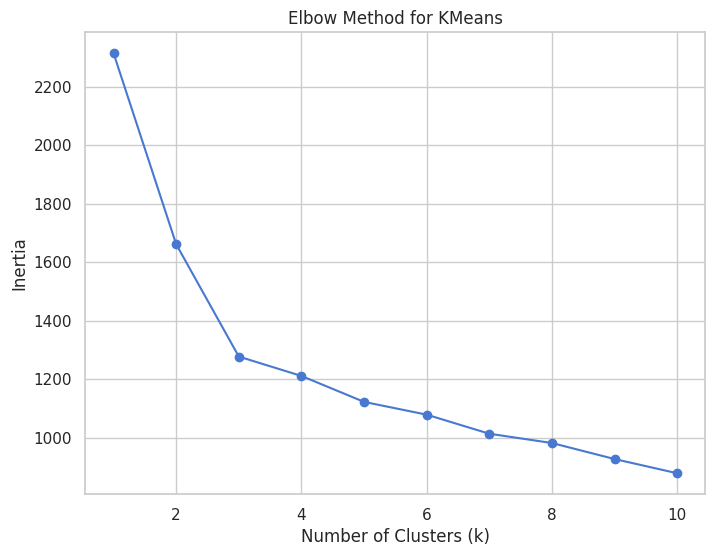

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for KMeans')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# === Clustering Algorithms ===


KMeans Clustering
Silhouette Score: 0.2849


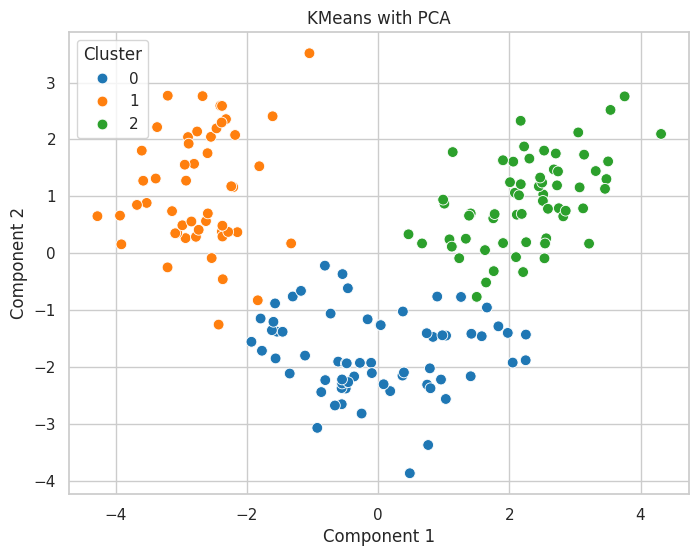

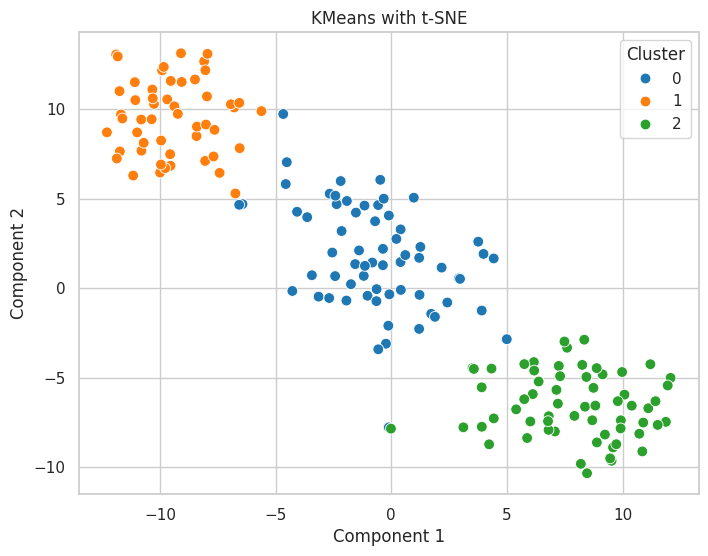

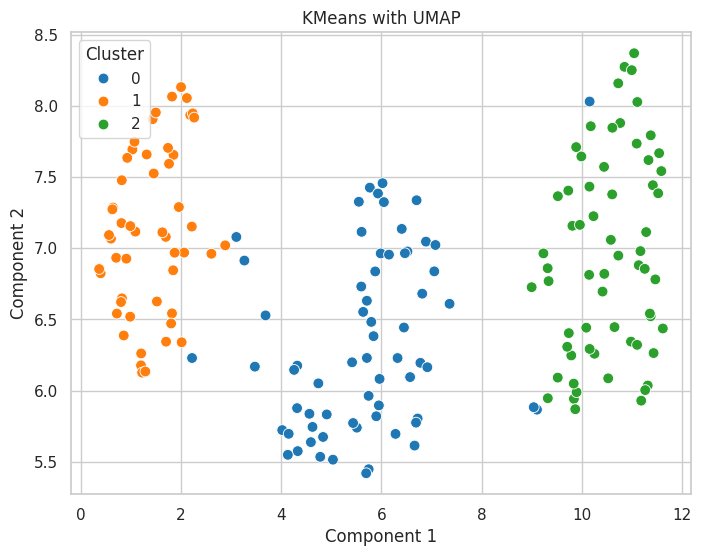

In [ ]:
# -- KMeans --
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
print("\nKMeans Clustering")
evaluate_clustering(X_scaled, labels_kmeans)
plot_clusters(X_pca, labels_kmeans, "KMeans with PCA")
plot_clusters(X_pca, labels_kmeans, "KMeans with PCA")
plot_clusters(X_tsne, labels_kmeans, "KMeans with t-SNE")
plot_clusters(X_umap, labels_kmeans, "KMeans with UMAP")


DBSCAN Clustering
Silhouette Score: Not applicable (only one cluster or contains noise)


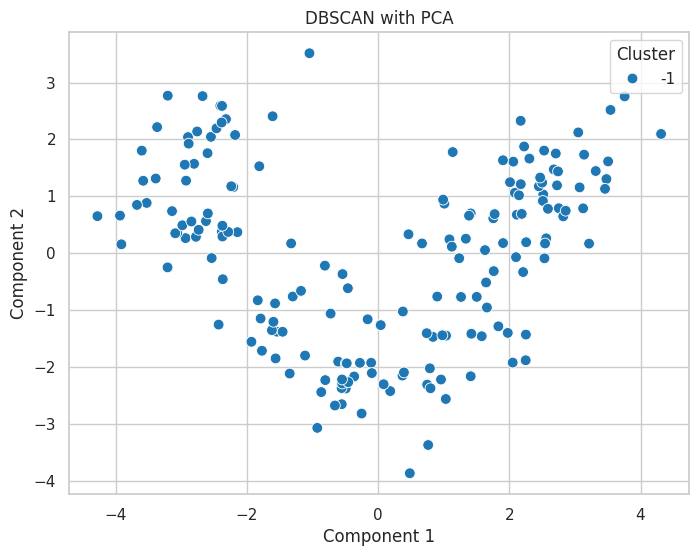

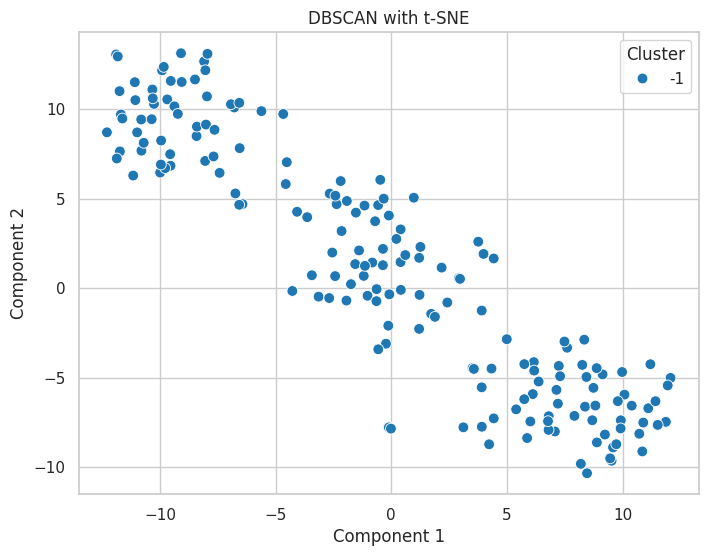

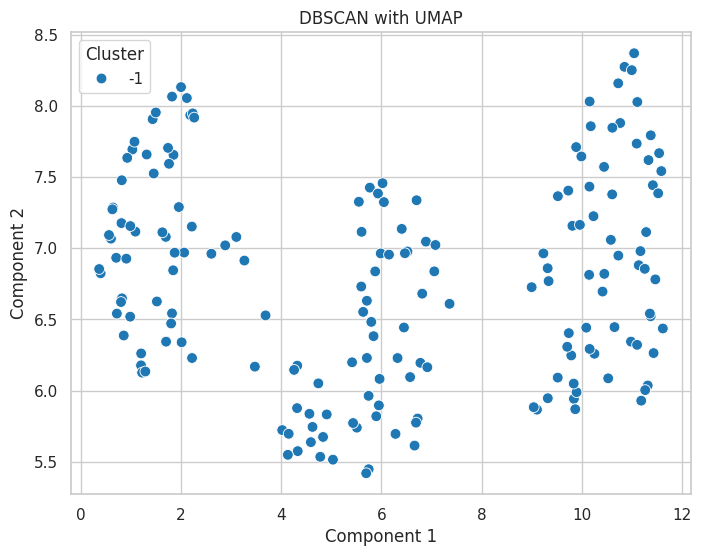

In [ ]:
# -- DBSCAN --
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)
print("\nDBSCAN Clustering")
evaluate_clustering(X_scaled, labels_dbscan)
plot_clusters(X_pca, labels_dbscan, "DBSCAN with PCA")
plot_clusters(X_tsne, labels_dbscan, "DBSCAN with t-SNE")
plot_clusters(X_umap, labels_dbscan, "DBSCAN with UMAP")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



HDBSCAN Clustering
Silhouette Score: Not applicable (only one cluster or contains noise)


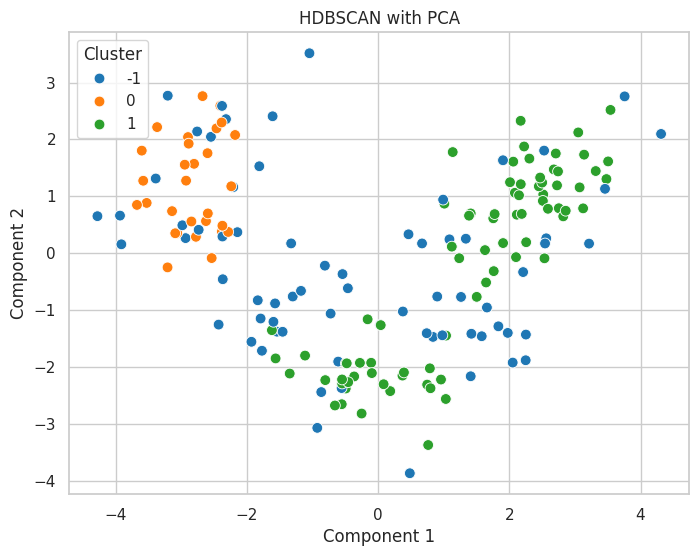

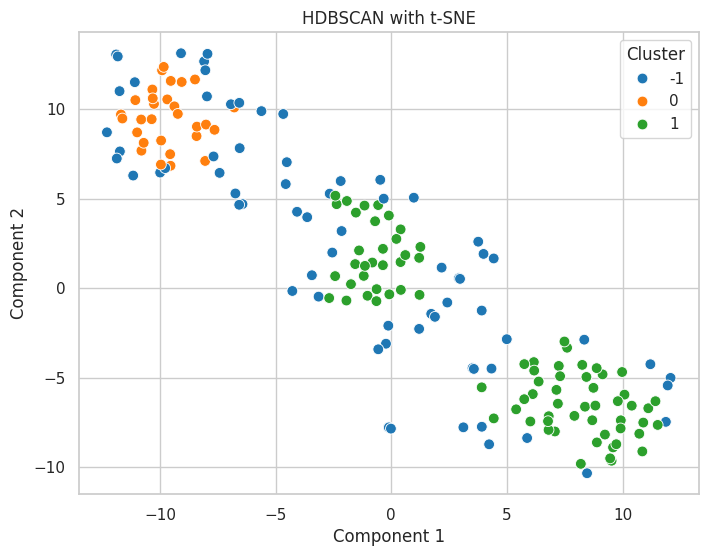

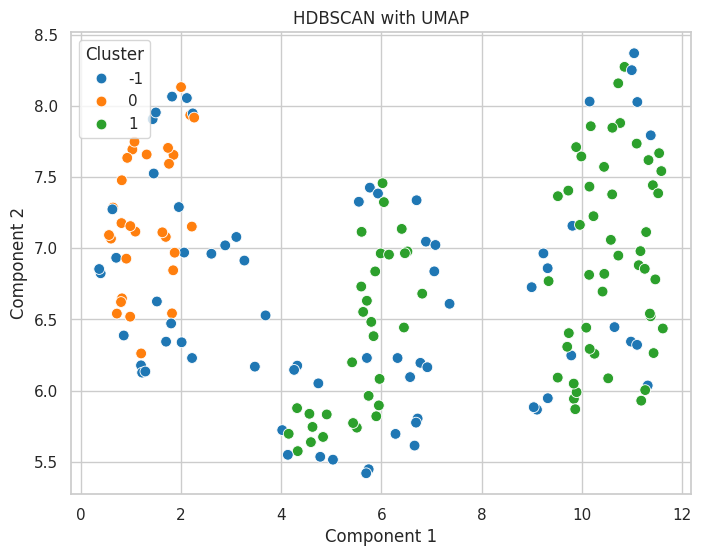

In [ ]:
# -- HDBSCAN --
hdb = hdbscan.HDBSCAN(min_cluster_size=5)
labels_hdbscan = hdb.fit_predict(X_scaled)
print("\nHDBSCAN Clustering")
evaluate_clustering(X_scaled, labels_hdbscan)
plot_clusters(X_pca, labels_hdbscan, "HDBSCAN with PCA")
plot_clusters(X_tsne, labels_hdbscan, "HDBSCAN with t-SNE")
plot_clusters(X_umap, labels_hdbscan, "HDBSCAN with UMAP")

In [ ]:

# Calculate and compare Silhouette Scores for different clustering methods
silhouette_scores = {}

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Define kmeans here to ensure it's available
y_kmeans = kmeans.fit_predict(X_scaled)  # Assign the result to y_kmeans
silhouette_scores['KMeans'] = silhouette_score(X_scaled, y_kmeans)

# KMeans with PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42)  # Define kmeans_pca
y_kmeans_pca = kmeans_pca.fit_predict(X_pca)  # Assign the result to y_kmeans_pca
silhouette_scores['KMeans_PCA'] = silhouette_score(X_pca, y_kmeans_pca)

# KMeans with t-SNE
kmeans_tsne = KMeans(n_clusters=3, random_state=42)  # Define kmeans_tsne
y_kmeans_tsne = kmeans_tsne.fit_predict(X_tsne)  # Assign the result to y_kmeans_tsne
silhouette_scores['KMeans_tSNE'] = silhouette_score(X_tsne, y_kmeans_tsne)

# KMeans with UMAP
kmeans_umap = KMeans(n_clusters=3, random_state=42)  # Define kmeans_umap
y_kmeans_umap = kmeans_umap.fit_predict(X_umap)  # Assign the result to y_kmeans_umap
silhouette_scores['KMeans_UMAP'] = silhouette_score(X_umap, y_kmeans_umap)


# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Define dbscan here
y_dbscan = dbscan.fit_predict(X_scaled)  # Assign the result to y_dbscan
# Calculate silhouette score if there is more than one cluster (including noise)
silhouette_scores['DBSCAN'] = silhouette_score(X_scaled, y_dbscan) if len(set(y_dbscan)) > 1 else float('nan')

# DBSCAN with PCA
dbscan_pca = DBSCAN(eps=1.5, min_samples=5)  # Define dbscan_pca
y_dbscan_pca = dbscan_pca.fit_predict(X_pca)  # Assign the result to y_dbscan_pca
# Use X_pca for silhouette calculation with DBSCAN_PCA
silhouette_scores['DBSCAN_PCA'] = silhouette_score(X_pca, y_dbscan_pca) if len(set(y_dbscan_pca)) > 1 else float('nan')

# DBSCAN with t-SNE
dbscan_tsne = DBSCAN(eps=0.5, min_samples=5)
y_dbscan_tsne = dbscan_tsne.fit_predict(X_tsne)
# Use X_tsne for silhouette calculation with DBSCAN_tSNE
silhouette_scores['DBSCAN_tSNE'] = silhouette_score(X_tsne, y_dbscan_tsne) if len(set(y_dbscan_tsne)) > 1 else float('nan')

# DBSCAN with UMAP
dbscan_umap = DBSCAN(eps=1.5, min_samples=5)  # Define dbscan_umap
y_dbscan_umap = dbscan_umap.fit_predict(X_umap)  # Assign the result to y_dbscan_umap
if len(set(y_dbscan_umap)) > 1:
    silhouette_scores['DBSCAN_UMAP'] = silhouette_score(X_umap, y_dbscan_umap)

# HDBSCAN
hdb = hdbscan.HDBSCAN(min_cluster_size=5)  # Define hdb here
y_hdb = hdb.fit_predict(X_scaled)  # Assign the result to y_hdb
if len(set(y_hdb)) > 1:
    silhouette_scores['HDBSCAN'] = silhouette_score(X_scaled, y_hdb)

# HDBSCAN with PCA
hdb_pca = hdbscan.HDBSCAN(min_cluster_size=5)
y_hdb_pca = hdb_pca.fit_predict(X_pca)
if len(set(y_hdb_pca)) > 1:
    silhouette_scores['HDBSCAN_PCA'] = silhouette_score(X_pca, y_hdb_pca)

# HDBSCAN with t-SNE
hdb_tsne = hdbscan.HDBSCAN(min_cluster_size=5)
y_hdb_tsne = hdb_tsne.fit_predict(X_tsne)
if len(set(y_hdb_tsne)) > 1:
    silhouette_scores['HDBSCAN_tSNE'] = silhouette_score(X_tsne, y_hdb_tsne)

# HDBSCAN with UMAP
hdb_umap = hdbscan.HDBSCAN(min_cluster_size=5)  # Define hdb_umap
y_hdb_umap = hdb_umap.fit_predict(X_umap)  # Assign the result to y_hdb_umap
if len(set(y_hdb_umap)) > 1:
    silhouette_scores['HDBSCAN_UMAP'] = silhouette_score(X_umap, y_hdb_umap)

# Find the best clustering method based on Silhouette Score
best_method = max(silhouette_scores, key=silhouette_scores.get)
best_score = silhouette_scores[best_method]

print("\nSilhouette Scores:")
for method, score in silhouette_scores.items():
    print(f"{method}: {score}")

print(f"\nBest Clustering Method: {best_method} (Silhouette Score: {best_score})")


Silhouette Scores:
KMeans: 0.2848589191898987
KMeans_PCA: 0.5601697480957203
KMeans_tSNE: 0.6165487766265869
KMeans_UMAP: 0.6885620951652527
DBSCAN: nan
DBSCAN_PCA: nan
DBSCAN_tSNE: nan
DBSCAN_UMAP: 0.6322726011276245
HDBSCAN: 0.09852054318649339
HDBSCAN_PCA: 0.14445368611136938
HDBSCAN_tSNE: 0.5274588465690613
HDBSCAN_UMAP: 0.5207675695419312

Best Clustering Method: KMeans_UMAP (Silhouette Score: 0.6885620951652527)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [ ]:

# Create a DataFrame from the silhouette_scores dictionary
scores_df = pd.DataFrame(list(silhouette_scores.items()), columns=['Method', 'Silhouette Score'])

# Display the DataFrame
scores_df

,Method,Silhouette Score
0,KMeans,0.284859
1,KMeans_PCA,0.560170
2,KMeans_tSNE,0.616549
3,KMeans_UMAP,0.688562
4,DBSCAN,NaN
5,DBSCAN_PCA,NaN
6,DBSCAN_tSNE,NaN
7,DBSCAN_UMAP,0.632273
8,HDBSCAN,0.098521
9,HDBSCAN_PCA,0.144454
